In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\cover_type (1).csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [ ]:
#Fine the rows and columns
df.shape

(145890, 13)

In [ ]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#Check null values
df.isnull().sum().any()

np.False_

In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           145890 non-null  int64 
 1   Aspect                              145890 non-null  int64 
 2   Slope                               145890 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64 
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64 
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64 
 6   Hillshade_9am                       145890 non-null  int64 
 7   Hillshade_Noon                      145890 non-null  int64 
 8   Hillshade_3pm                       145890 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64 
 10  Cover_Type                          145890 non-null  object
 11  Wilderness_Area                     145

In [ ]:
# Describing the features
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,1.186593,23.364905
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,0.656571,8.215184
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,1.000000,12.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,1.000000,29.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,1.000000,29.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,4.000000,40.000000


In [ ]:
# Find the value count of theoutput feature
df['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

In [ ]:
# Handlie outliers
numeric_cols = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Handle skewness

for col in numeric_cols:
    if df[col].skew() > 0.75:
        df[col] = np.log1p(df[col])

In [15]:
#distance ratio
df['Hydro_Ratio'] = df['Vertical_Distance_To_Hydrology'] / (df['Horizontal_Distance_To_Hydrology']+1)

In [16]:
# shade indices differences).
df['Shade_Diff'] = df['Hillshade_3pm'] - df['Hillshade_9am']

In [ ]:
# Encoding the output feature
le = LabelEncoder()
df['Cover_Type'] = le.fit_transform(df['Cover_Type'])

In [ ]:
#saving the encoded feature
pickle.dump(le, open("cover_type_encoder.pkl", "wb"))

In [19]:
#  Check which columns contain inf or -inf
print("Columns containing ±inf values:")
print(df[numeric_cols].isin([np.inf, -np.inf]).any())

print("\nRows containing ±inf values:")
print(df[df[numeric_cols].isin([np.inf, -np.inf]).any(axis=1)])


Columns containing ±inf values:
Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology         True
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
dtype: bool

Rows containing ±inf values:
        Elevation    Aspect  Slope  Horizontal_Distance_To_Hydrology  \
4            2595  3.828641      2                               153   
16           2610  5.560682      1                               120   
181          2755  5.771441      4                                30   
458          2715  5.318120      5                               124   
523          2599  4.499810     10                                30   
...           ...       ...    ...                    

In [20]:
# Clean the infinities

# Replace inf/-inf with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Force numeric conversion (anything invalid → NaN)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")


In [21]:
# Drop rows that still contain NaN
df = df.dropna(subset=numeric_cols).reset_index(drop=True)

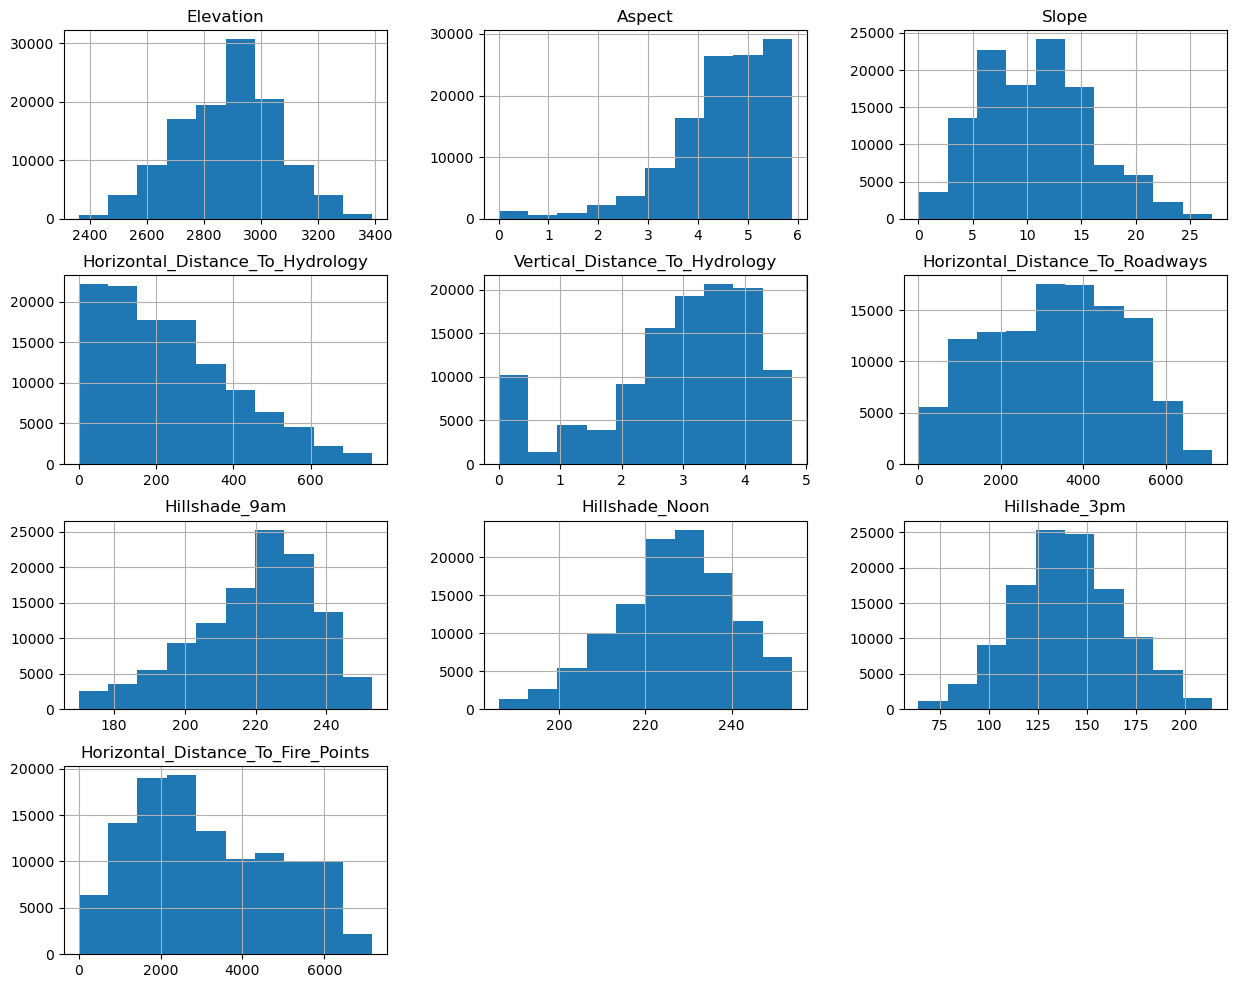

In [22]:
# Histogram for numeric features
df[numeric_cols].hist(figsize=(15,12))
plt.show()


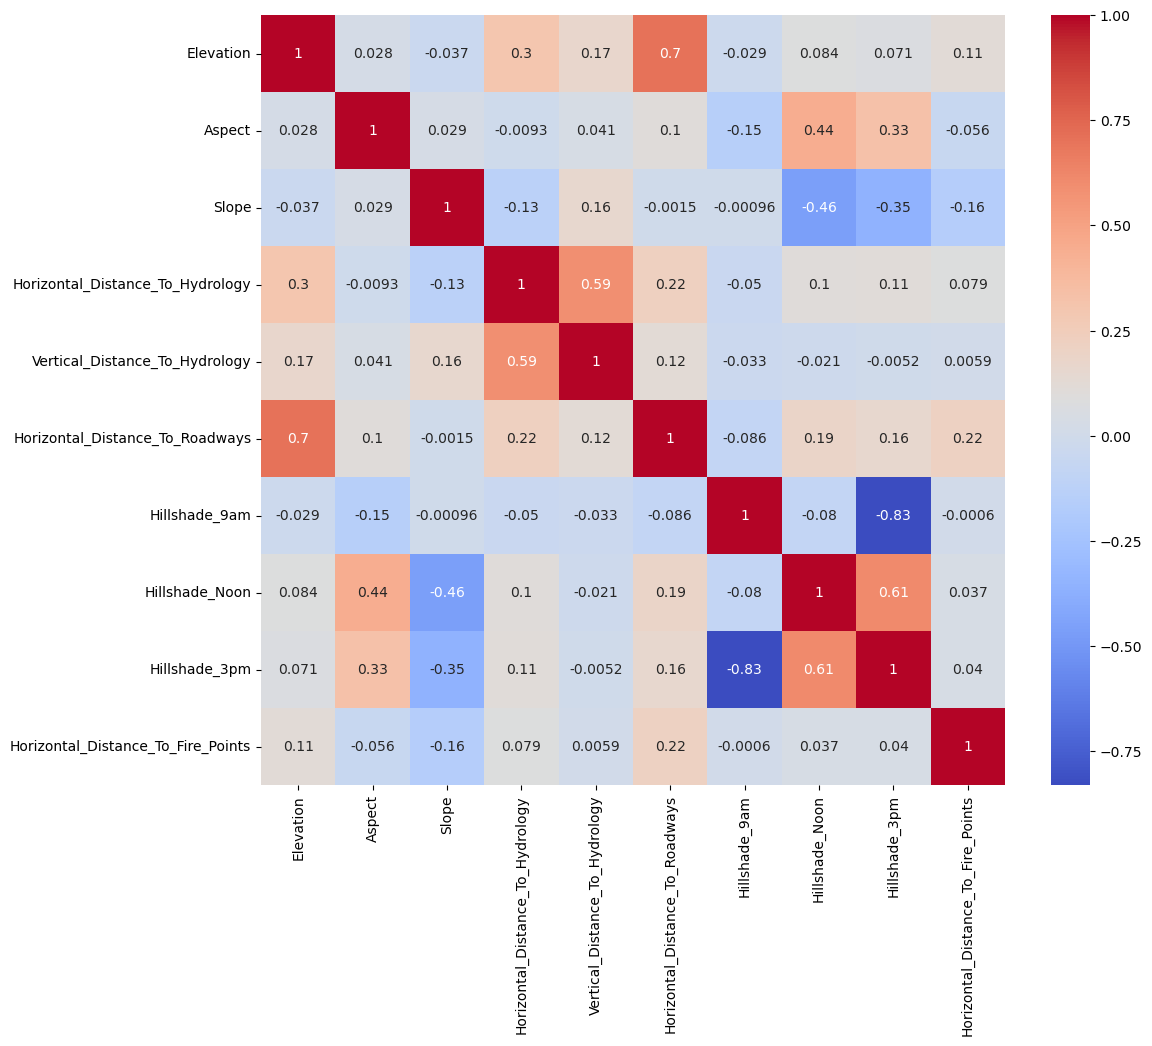

In [25]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=True)
plt.show()


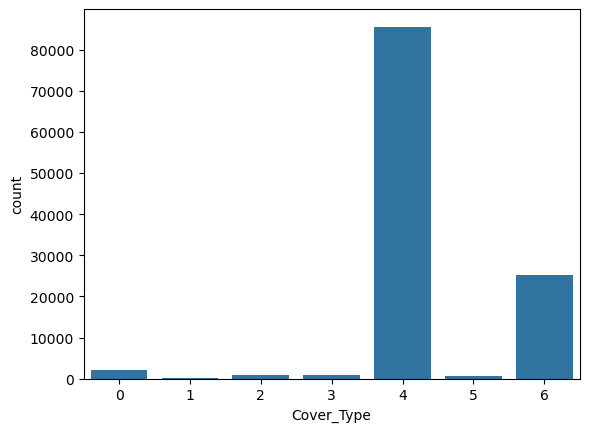

In [26]:
# Class distribution
sns.countplot(x='Cover_Type', data=df)
plt.show()

In [30]:
# input and output features
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [ ]:
# Class imbalance using SMOTE
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(random_state=42))
])
X_res, y_res = pipeline.fit_resample(X, y)
X_res = pd.DataFrame(X_res, columns=X.columns)

In [ ]:
#low variance filtering

var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)

selected_variance_features = X.columns[var_thresh.get_support()]
X_var = X[selected_variance_features]


In [ ]:
#Feature importance

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X[selected_variance_features], y)

importances = pd.Series(
    rf.feature_importances_,
    index=selected_variance_features
).sort_values(ascending=False)

print(importances)


Elevation                             0.274206
Horizontal_Distance_To_Roadways       0.157489
Horizontal_Distance_To_Fire_Points    0.148562
Soil_Type                             0.071325
Horizontal_Distance_To_Hydrology      0.061148
Vertical_Distance_To_Hydrology        0.052323
Wilderness_Area                       0.044159
Aspect                                0.038369
Hillshade_Noon                        0.035947
Shade_Diff                            0.031894
Hillshade_3pm                         0.030997
Hillshade_9am                         0.029555
Slope                                 0.024027
dtype: float64


In [37]:
important_features = importances[importances > 0.01].index
X_selected = X[important_features]

print("Selected features:")
print(list(important_features))


Selected features:
['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Wilderness_Area', 'Aspect', 'Hillshade_Noon', 'Shade_Diff', 'Hillshade_3pm', 'Hillshade_9am', 'Slope']


In [41]:
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 5)

In [42]:
# Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Taking the predictions from the model 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    
    
    print(name)
    print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
    print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average='weighted'), 3))
    print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average='weighted'), 3))
    print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average='weighted'), 3))

    print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
    print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred, average='weighted'), 3))
    print('Testing Recall :', np.round(metrics.recall_score(y_test, y_test_pred, average='weighted'), 3))
    print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred, average='weighted'), 3))


Random Forest
Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.994
Testing Precision : 0.994
Testing Recall : 0.994
Testing F1 Score : 0.994
Decision Tree
Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.987
Testing Precision : 0.987
Testing Recall : 0.987
Testing F1 Score : 0.987
Logistic Regression
Training Accuracy : 0.648
Training Precision : 0.642
Training Recall : 0.648
Training F1 Score : 0.644

Testing Accuracy : 0.65
Testing Precision : 0.644
Testing Recall : 0.65
Testing F1 Score : 0.645
KNN
Training Accuracy : 0.995
Training Precision : 0.995
Training Recall : 0.995
Training F1 Score : 0.995

Testing Accuracy : 0.992
Testing Precision : 0.992
Testing Recall : 0.992
Testing F1 Score : 0.992
XGBoost
Training Accuracy : 0.989
Training Precision : 0.989
Training Recall : 0.989
Training F1 Score : 0.989

Testing Accuracy : 0.985
Testing Precision

In [48]:
# Creating the parameter dictionary 
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease' : [0.1, 0.005, 0.01, 0.015, 0.001, 0.0001]
}

In [49]:
rand = RandomizedSearchCV(RandomForestClassifier(random_state=5), params, cv=3, scoring='accuracy')
rand.fit(X_train, y_train)
best_model = rand.best_estimator_

In [50]:
pickle.dump(best_model, open("forest_cover_model.pkl", "wb"))